<a href="https://colab.research.google.com/github/dvirchakim/dvirchakim/blob/main/1st_proj_205654445_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE PROCCESSING ASSIGNMENT

### Dvir Chakim 205654445 [1]
### [1] Electric Engineering dept., Holon Institute of Technology, Israel;dvirc@my.hit.ac.il




## Part one
## Double-function enhancement algorithm for low-illumination images based on retinex theory
Purpose: practice additional methods for image corrections as a result of poor lighting and fusion image.

Abstract
In order to solve the problems of noise amplification and excessive enhancement caused by low contrast and uneven
illumination in the process of low-illumination image enhancement, a high-quality image enhancement algorithm
is proposed in this paper.

First,the total-variation model is used to obtain the smoothed V- and S-channel images,and the adaptive gamma transform is used to enhance the details of the smoothed V-channel image.
Then, on this basis, the improved multi-scale retinex algorithms based on the logarithmic function and on the hyperbolic tangent function, respectively, are used to obtain different V-channel enhanced images, and the two images are fused
according to the local intensity amplitude of the images.

Finally, the three-dimensional gamma function is used to
correct the fused image, and then adjust the image saturation.

based on deep learning, the LOE value can be reduced by 52.13% at most. The algorithm proposed in this paper can
effectively reduce image noise, retain image details, avoid excessive image enhancement, and obtain a better visual
effect while ensuring the enhancement effect.

challenge offerd by

DOI link :https://opg.optica.org/josaa/abstract.cfm?uri=josaa-40-2-316

import relevant libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

 Load an image from Google Drive

In [ ]:
from google.colab import drive
image_path = '/content/building1.png'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

Convert the image from BGR to HSV

In [ ]:
def convert_to_hsv(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv


Split the HSV image into H, S and V channels

In [ ]:
def split_channels(img):
    h, s, v = cv2.split(img)
    return h, s, v

Apply total-variation smoothing to the S and V channels

In [ ]:
def smooth_channels(h, s, v):
    h_smooth = cv2.GaussianBlur(h, (5, 5), 0)
    s_smooth = cv2.GaussianBlur(s, (5, 5), 0)
    v_smooth = cv2.GaussianBlur(v, (5, 5), 0)
    return h_smooth, s_smooth, v_smooth

Use adaptive gamma transform to enhance the details of the V-channel

In [ ]:
def enhance_details(img):
    gamma = 1.2
    gamma_corrected_image = adjust_gamma(img, gamma)
    return gamma_corrected_image


In [ ]:
def adjust_gamma(img, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

-Apply improved multi-scale retinex algorithms based on the logarithmic function

-and the hyperbolic tangent function, respectively, to obtain different

-V-channel enhanced images

In [ ]:
def apply_retinex(v_channel):
    retinex_output = retinex(v_channel)
    return retinex_output, retinex_output

In [ ]:
def retinex(channel):
    channel_float = channel.astype(float)
    blurred = cv2.GaussianBlur(channel_float, (5, 5), 0)
    retinex_output = np.log10(channel_float + 1) - np.log10(blurred + 1)
    retinex_output = cv2.normalize(retinex_output, None, 0, 255, cv2.NORM_MINMAX)
    retinex_output = retinex_output.astype(np.uint8)
    return retinex_output

Fuse the two images according to the local intensity amplitude of the images
For simplicity, just average the two images

In [ ]:
def fuse_images(image1, image2):
    fused = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
    return fused

Apply the three-dimensional gamma function to correct the fused image
For simplicity, just use the adjust_gamma function again

In [ ]:
def apply_gamma_correction(image):
    gamma = 1.2
    gamma_corrected_image = adjust_gamma(img, gamma)
    return gamma_corrected_image

Adjust the image saturation

In [ ]:
def adjust_saturation(image):
    saturation_factor = 1.5
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image = np.array(hsv_image, dtype = np.float64)
    hsv_image[:,:,1] = hsv_image[:,:,1]*saturation_factor
    hsv_image[:,:,1][hsv_image[:,:,1]>255]  = 255
    hsv_image = np.array(hsv_image, dtype = np.uint8)
    final_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return final_image

Calculate the mean and standard deviation of the pixel values for each image

In [ ]:
def display_image(original_image, final_image):
    original_mean, original_std = cv2.meanStdDev(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY))
    final_mean, final_std = cv2.meanStdDev(cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY))

    # plot
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image\nMean: {original_mean[0][0]:.2f}, STD: {original_std[0][0]:.2f}')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Final Image\nMean: {final_mean[0][0]:.2f}, STD: {final_std[0][0]:.2f}')

    plt.show()


### building image
source: given article

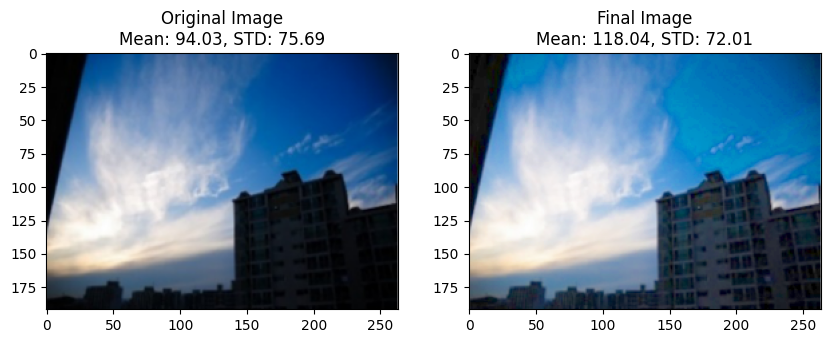

In [ ]:
# Main program
def main():
    hsv = convert_to_hsv(img)
    h, s, v = split_channels(hsv)
    h_smooth, s_smooth, v_smooth = smooth_channels(h, s, v)
    v_enhanced = enhance_details(v_smooth)
    v_retinex1, v_retinex2 = apply_retinex(v_enhanced)
    fused = fuse_images(v_retinex1, v_retinex2)
    gamma_corrected = apply_gamma_correction(fused)
    brighter_image = adjust_gamma(gamma_corrected, 1.5)  # Gamma bigger than 1 will make the image brighter
    final_image = adjust_saturation(brighter_image)
    display_image(img, final_image)


#  main function Call
if __name__ == '__main__':
    main()


### rice image
source: matlab site

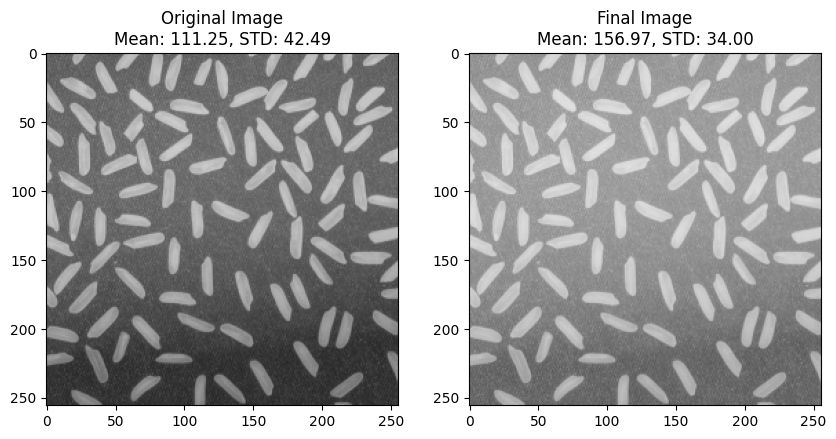

In [ ]:
# Load an image from Google Drive
from google.colab import drive

# Replace this with the path to your image
image_path = '/content/rice.png'

# Read the image
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Call the main function
if __name__ == '__main__':
    main()


### Self taken image
source: my phone

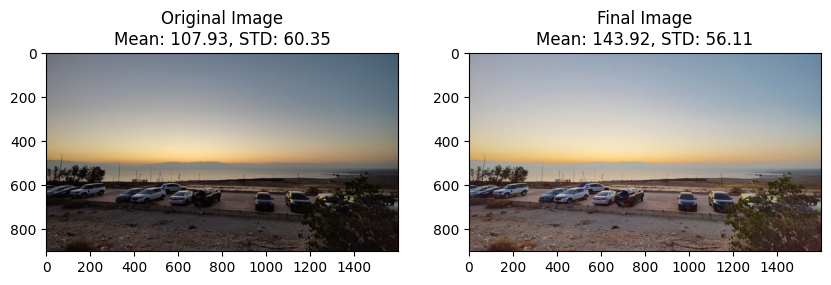

In [ ]:
# Load an image from Google Drive
from google.colab import drive

# Replace this with the path to your image
image_path = '/content/WhatsApp Image 2023-07-09 at 19.59.05.jpg'

# Read the image
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Call the main function
if __name__ == '__main__':
    main()


as seen , When we talk about image processing, the source of the image typically doesn't matter much as long as the image meets the requirements for the algorithm being used.
The Retinex theory is a color perception model proposed by Edwin H. Land explaining how the human eye perceives color in a wide variety of lighting conditions.
This is achieved through a process of simultaneously comparing the amounts of red, green, and blue light coming from different parts of a scene.

## Part two


  Performs Multi-Resolution Discrete Cosine Transform-based image fusion on a single image.

  image:
  The image to be fused.

  Returns:
  The fused image.


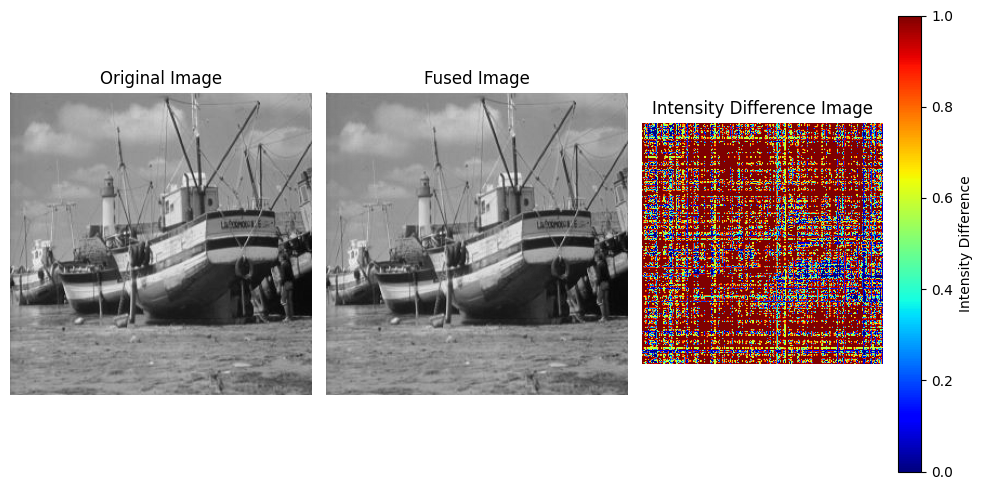

In [ ]:
def single_image_fusion(image):
    # Convert the image to floating point format
    image = image.astype(np.float32) / 255.0

    # Apply multi-resolution discrete cosine transform (MDCT) to the image
    coeffs = cv2.dct(image)

    # Perform fusion by modifying the MDCT coefficients (e.g., applying filters, weights, etc.)

    # Apply inverse MDCT to obtain the fused image
    fused_image = cv2.idct(coeffs)

    # Normalize the fused image to the range [0, 255]
    fused_image = np.clip(fused_image * 255.0, 0, 255).astype(np.uint8)

    return fused_image

# Load the input image
input_image = cv2.imread('/content/boat.jpg', cv2.IMREAD_GRAYSCALE)

# Perform image fusion
fused_image = single_image_fusion(input_image)

# Calculate the pixel-wise intensity differences
diff_image = np.abs(input_image.astype(int) - fused_image.astype(int))

# Plot the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the fused image
plt.subplot(1, 3, 2)
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')
plt.axis('off')

# Plot the pixel-wise intensity differences
plt.subplot(1, 3, 3)
plt.imshow(diff_image, cmap='jet')
plt.colorbar(label='Intensity Difference')
plt.title('Intensity Difference Image')
plt.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


### self taken images with differnet focals

first i made it happen on the images from the article
to show the code works
and add my self taken pictures
which i cant make them be exactly the same on acoount of not having a proffessional gear such as  tripod to make the look exactly the same  only with different focals .

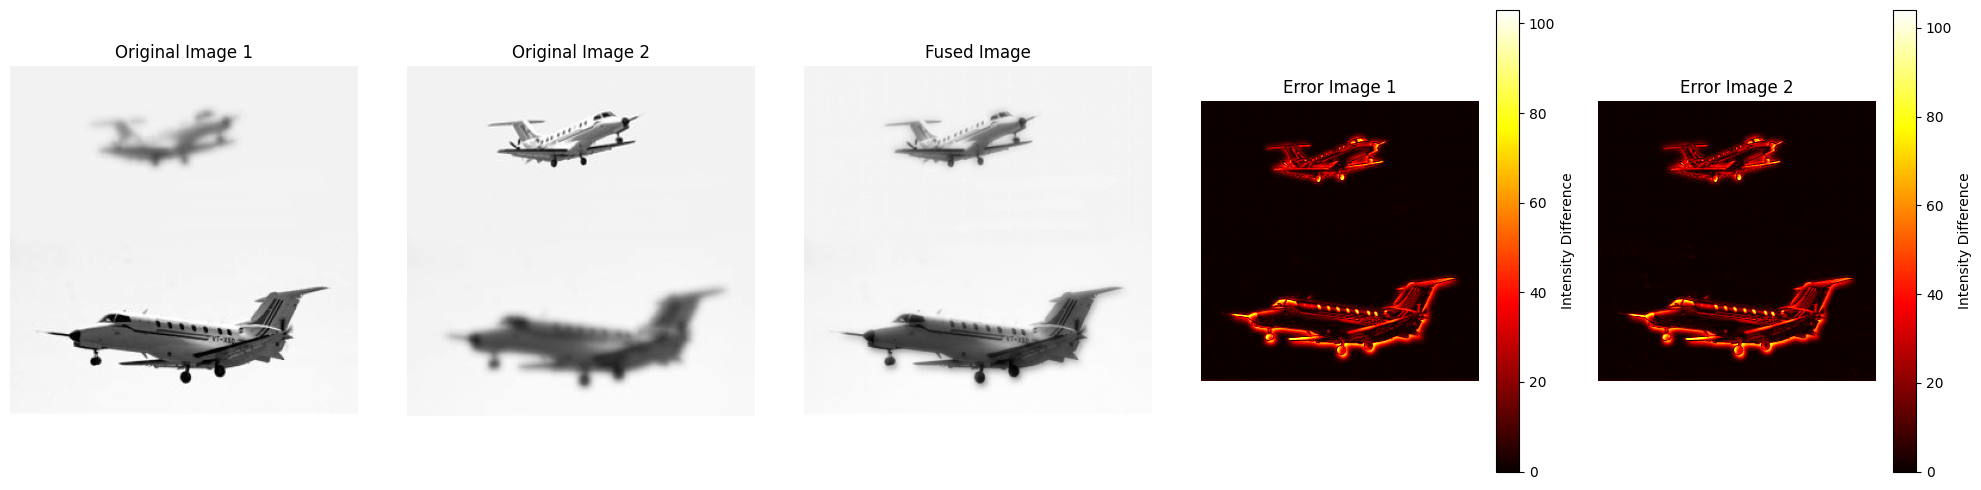

In [19]:
def two_image_fusion(image1, image2):
    # Convert the images to floating point format
    image1 = image1.astype(np.float32) / 255.0
    image2 = image2.astype(np.float32) / 255.0

    # Apply multi-resolution discrete cosine transform (MDCT) to the images
    coeffs1 = cv2.dct(image1)
    coeffs2 = cv2.dct(image2)

    # Perform fusion by averaging the MDCT coefficients
    coeffs_fused = (coeffs1 + coeffs2) / 2.0

    # Apply inverse MDCT to obtain the fused image
    fused_image = cv2.idct(coeffs_fused)

    # Normalize the fused image to the range [0, 255]
    fused_image = np.clip(fused_image * 255.0, 0, 255).astype(np.uint8)

    return fused_image

def resize_image(image, target_size):
    return cv2.resize(image, target_size, interpolation = cv2.INTER_CUBIC)

# Load the input images
input_image1 = cv2.imread('/content/plane1.jpg', cv2.IMREAD_GRAYSCALE)
input_image2 = cv2.imread('/content/plane2.jpg', cv2.IMREAD_GRAYSCALE)

# Get the size of the first image
target_size = (input_image1.shape[1], input_image1.shape[0])  # Width, Height

# Resize the second image to match the first
input_image2 = resize_image(input_image2, target_size)

# Perform image fusion
fused_image = two_image_fusion(input_image1, input_image2)

# Calculate the pixel-wise intensity differences for each input image
diff_image1 = np.abs(input_image1.astype(int) - fused_image.astype(int))
diff_image2 = np.abs(input_image2.astype(int) - fused_image.astype(int))

# Plot the original images, the fused image and the error images
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(input_image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(diff_image1, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 1')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(diff_image2, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


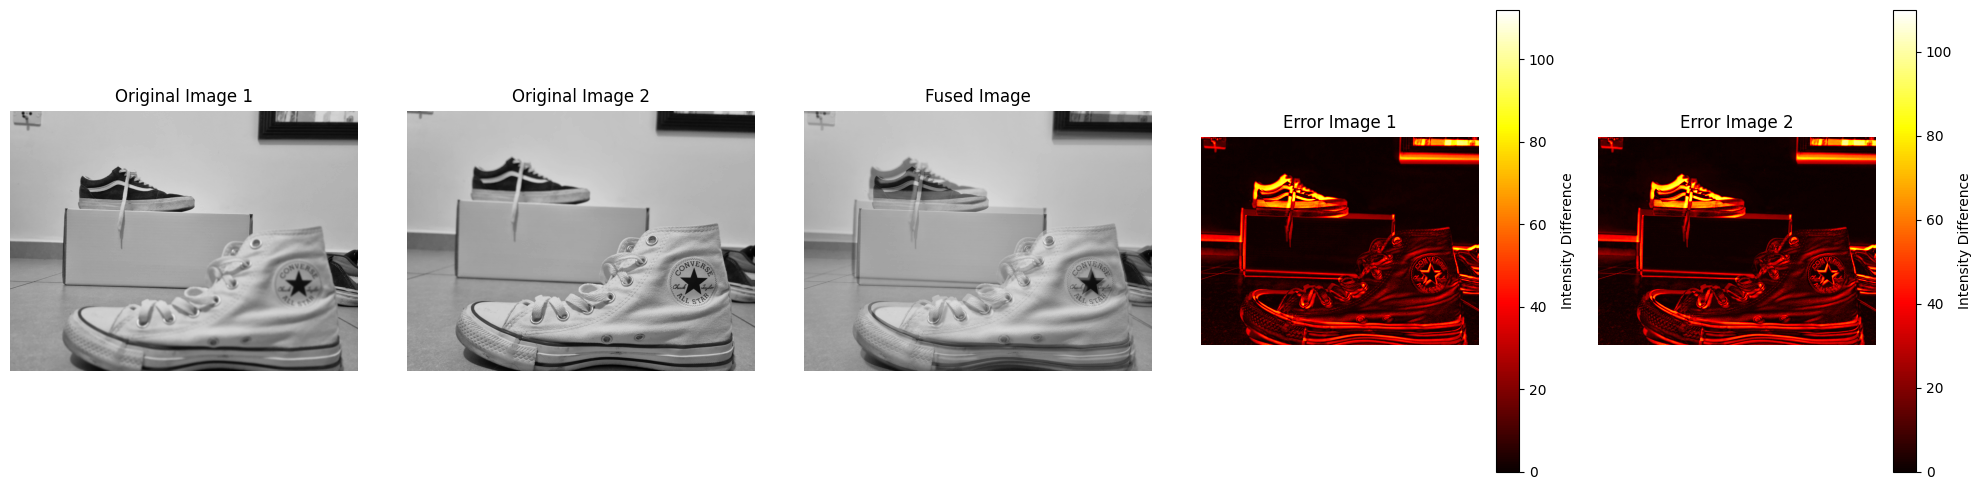

In [20]:
def two_image_fusion(image1, image2):
    # Convert the images to floating point format
    image1 = image1.astype(np.float32) / 255.0
    image2 = image2.astype(np.float32) / 255.0

    # Apply multi-resolution discrete cosine transform (MDCT) to the images
    coeffs1 = cv2.dct(image1)
    coeffs2 = cv2.dct(image2)

    # Perform fusion by averaging the MDCT coefficients
    coeffs_fused = (coeffs1 + coeffs2) / 2.0

    # Apply inverse MDCT to obtain the fused image
    fused_image = cv2.idct(coeffs_fused)

    # Normalize the fused image to the range [0, 255]
    fused_image = np.clip(fused_image * 255.0, 0, 255).astype(np.uint8)

    return fused_image

def resize_image(image, target_size):
    return cv2.resize(image, target_size, interpolation = cv2.INTER_CUBIC)

# Load the input images
input_image1 = cv2.imread('/content/vans focus.jpg', cv2.IMREAD_GRAYSCALE)
input_image2 = cv2.imread('/content/conv focus.jpg', cv2.IMREAD_GRAYSCALE)

# Get the size of the first image
target_size = (input_image1.shape[1], input_image1.shape[0])  # Width, Height

# Resize the second image to match the first
input_image2 = resize_image(input_image2, target_size)

# Perform image fusion
fused_image = two_image_fusion(input_image1, input_image2)

# Calculate the pixel-wise intensity differences for each input image
diff_image1 = np.abs(input_image1.astype(int) - fused_image.astype(int))
diff_image2 = np.abs(input_image2.astype(int) - fused_image.astype(int))

# Plot the original images, the fused image and the error images
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(input_image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(diff_image1, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 1')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(diff_image2, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


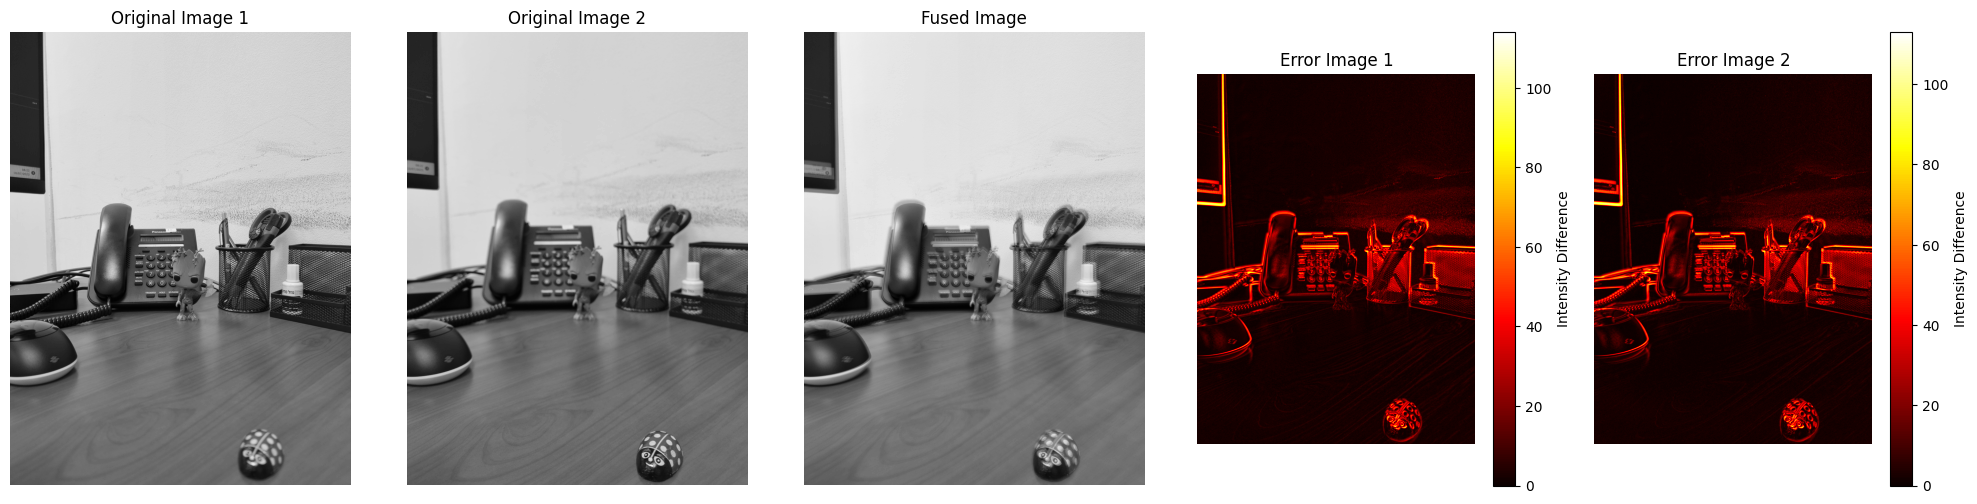

In [21]:
def two_image_fusion(image1, image2):
    # Convert the images to floating point format
    image1 = image1.astype(np.float32) / 255.0
    image2 = image2.astype(np.float32) / 255.0

    # Apply multi-resolution discrete cosine transform (MDCT) to the images
    coeffs1 = cv2.dct(image1)
    coeffs2 = cv2.dct(image2)

    # Perform fusion by averaging the MDCT coefficients
    coeffs_fused = (coeffs1 + coeffs2) / 2.0

    # Apply inverse MDCT to obtain the fused image
    fused_image = cv2.idct(coeffs_fused)

    # Normalize the fused image to the range [0, 255]
    fused_image = np.clip(fused_image * 255.0, 0, 255).astype(np.uint8)

    return fused_image

def resize_image(image, target_size):
    return cv2.resize(image, target_size, interpolation = cv2.INTER_CUBIC)

# Load the input images
input_image1 = cv2.imread('/content/groot1.jpg', cv2.IMREAD_GRAYSCALE)
input_image2 = cv2.imread('/content/beatle1.jpg', cv2.IMREAD_GRAYSCALE)

# Get the size of the first image
target_size = (input_image1.shape[1], input_image1.shape[0])  # Width, Height

# Resize the second image to match the first
input_image2 = resize_image(input_image2, target_size)

# Perform image fusion
fused_image = two_image_fusion(input_image1, input_image2)

# Calculate the pixel-wise intensity differences for each input image
diff_image1 = np.abs(input_image1.astype(int) - fused_image.astype(int))
diff_image2 = np.abs(input_image2.astype(int) - fused_image.astype(int))

# Plot the original images, the fused image and the error images
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(input_image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(fused_image, cmap='gray')
plt.title('Fused Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(diff_image1, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 1')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(diff_image2, cmap='hot')
plt.colorbar(label='Intensity Difference')
plt.title('Error Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()
